First 5 rows of dataset:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovat

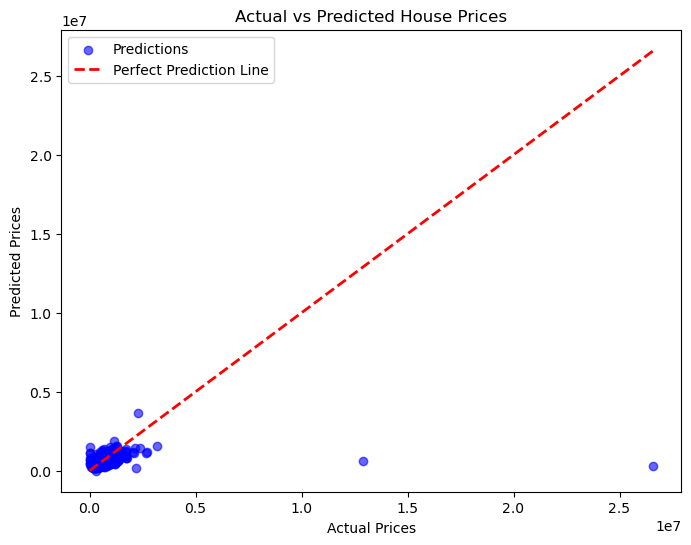

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score


df = pd.read_csv(r"P:\dataset\data.csv")

print("First 5 rows of dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())


features = ["sqft_living", "bedrooms", "sqft_lot", "floors"]

df = df.dropna(subset=["price"] + features)

X = df[features]
y = df["price"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain size:", len(X_train))
print("Test size:", len(X_test))


model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)   # ✅ no warning
r2 = r2_score(y_test, y_pred)

print("\nEvaluation metrics:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


new_house = pd.DataFrame([[2200, 3, 5000, 2]], columns=features)  # ✅ no warning
pred_price = model.predict(new_house)
print("\nPredicted price for new house:", pred_price[0])


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()